In [1]:
#Import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Create a set of random latitiude and longitude combinations 

lats = np.random.uniform(low=-90.000,high=90.000,size=1500)

lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
#Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
#Import the requests library 
import requests 

#Import the API key 
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sao jose da coroa grande
Processing Record 5 of Set 1 | comodoro rivadavia
Processing Record 6 of Set 1 | kabanjahe
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | grinnell
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | north bend
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Pr

In [14]:
#Convert the array of dictionaries to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,55.26,92,0,3.74,BR,2022-04-20 01:57:49
1,Vaini,-21.2000,-175.2000,78.96,89,100,8.05,TO,2022-04-20 01:56:35
2,Busselton,-33.6500,115.3333,64.56,56,3,10.11,AU,2022-04-20 01:59:04
3,Sao Jose Da Coroa Grande,-8.8978,-35.1478,77.58,86,21,6.49,BR,2022-04-20 02:05:25
4,Comodoro Rivadavia,-45.8667,-67.5000,55.54,46,76,15.99,AR,2022-04-20 02:03:01
5,Kabanjahe,3.1001,98.4908,68.18,86,100,0.40,ID,2022-04-20 02:05:25
6,Kodiak,57.7900,-152.4072,42.31,70,75,13.80,US,2022-04-20 02:05:25
7,Grinnell,41.7430,-92.7224,46.38,49,100,13.80,US,2022-04-20 02:05:26
8,Ushuaia,-54.8000,-68.3000,42.46,81,20,10.36,AR,2022-04-20 02:05:26
9,Hermanus,-34.4187,19.2345,62.80,60,42,9.13,ZA,2022-04-20 02:05:27


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2022-04-20 01:57:49,-24.7911,-50.0119,55.26,92,0,3.74
1,Vaini,TO,2022-04-20 01:56:35,-21.2000,-175.2000,78.96,89,100,8.05
2,Busselton,AU,2022-04-20 01:59:04,-33.6500,115.3333,64.56,56,3,10.11
3,Sao Jose Da Coroa Grande,BR,2022-04-20 02:05:25,-8.8978,-35.1478,77.58,86,21,6.49
4,Comodoro Rivadavia,AR,2022-04-20 02:03:01,-45.8667,-67.5000,55.54,46,76,15.99
...,...,...,...,...,...,...,...,...,...
566,Namatanai,PG,2022-04-20 02:20:29,-3.6667,152.4333,85.98,64,21,6.91
567,Ossora,RU,2022-04-20 02:20:30,59.2353,163.0719,28.15,77,70,1.30
568,Minas,UY,2022-04-20 02:20:30,-34.3759,-55.2377,59.67,78,66,7.23
569,Acajutla,SV,2022-04-20 02:20:31,13.5928,-89.8275,82.38,71,29,2.42


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [18]:
#Import time module 
import time 

#Get todays date in seconds 
today = time.strftime("%x")
today

'04/19/22'

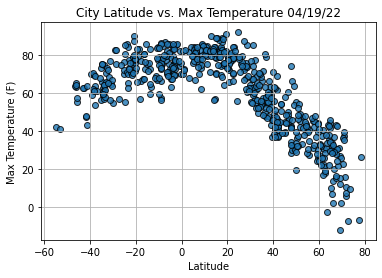

In [19]:
#Create scatter plots
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

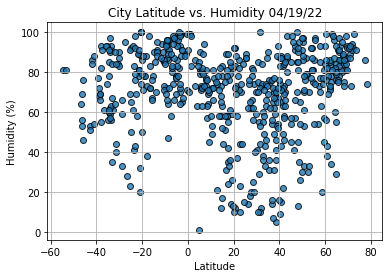

In [20]:
#Latitude vs humidity 
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

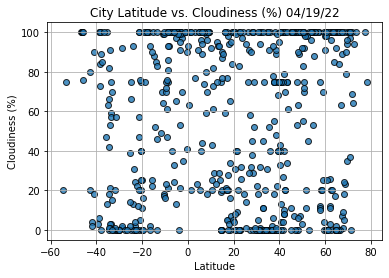

In [21]:
#Latitude vs Cloudiness 
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


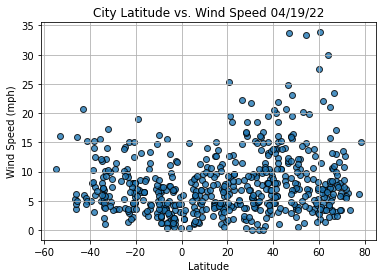

In [22]:
#Latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()